# Model Evaluation- Part 4

Author: Harry Zhou

Contact: haininzhou@gmail.com

Date: 2023-07-20

# Introduction

Model evaluation is a crucial step in assessing the performance and effectiveness of a predictive model. It allows us to understand how well our model generalizes to unseen data and provides insights into its strengths and limitations. In this report, we present a comprehensive evaluation of our part, we aiming to analyze its performance and provide valuable insights for decision-making and further improvements.

## Table of Contents

1.[Preprocessing data ](#1.-Preprocessing-data)
  
  
2.[Fitting the Different Sklearn Machine Learning Classifiers](#2.-Fitting-the-Different-Sklearn-Machine-Learning-Classifiers)
  
  
3.[Summary](#3.-Summary)

## 1. Preprocessing data

In [1]:
# Importing everything we need
# The usual packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Splitting data
from sklearn.model_selection import train_test_split

# Scalers
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import RocCurveDisplay

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [2]:
df_clean = pd.read_csv("diabetes_health_indicators_BRFSS2021.csv")

df_clean.head()

,Diabetes_012,Age,Sex,Education,Income,HighBP,CholCheck,HighChol,BMI,Smoker,...,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Blind
0,0,11,0,4,5,0,1,1,1,1,...,1,1,0,1,0,5,10,20,0,0
1,2,11,0,4,3,1,1,0,3,0,...,1,0,0,1,0,2,0,0,0,0
2,2,9,0,4,7,1,1,1,4,0,...,1,1,0,1,0,2,10,0,0,0
3,0,13,1,5,6,0,1,0,2,1,...,0,0,0,1,0,3,0,0,1,0
4,0,10,0,4,8,1,1,0,4,1,...,1,1,0,1,0,3,5,25,1,0


In [3]:
#Copy old table to new one.
brfss_binary = df_clean
#Change the diabetics 2 to a 1, so that we have 0 meaning non-diabetic and pre-diabetic and 1 meaning diabetic.
brfss_binary['Diabetes_012'] = brfss_binary['Diabetes_012'].replace({2:1})

#Change the column name to Diabetes_binary
brfss_binary = brfss_binary.rename(columns = {'Diabetes_012': 'Diabetes_binary'})
brfss_binary.Diabetes_binary.unique()

array([0, 1], dtype=int64)

Base on the Part3, we did correlations between each independent variables, we drop HeartDisease columns.

In [4]:
# Drop the identified columns as colliniear

brfss_binary.drop(columns=['HeartDisease'], axis=1, inplace=True)

Base on the part 3 ,we selected 17 features as our final dataset.

In [5]:
colomns = ["Fruits" , "Veggies" , "CholCheck" , "AnyHealthcare" , "NoDocbcCost"]
brfss_binary.drop(colomns , axis= 1 ,inplace=True)

In [6]:
brfss_binary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215258 entries, 0 to 215257
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       215258 non-null  int64
 1   Age                   215258 non-null  int64
 2   Sex                   215258 non-null  int64
 3   Education             215258 non-null  int64
 4   Income                215258 non-null  int64
 5   HighBP                215258 non-null  int64
 6   HighChol              215258 non-null  int64
 7   BMI                   215258 non-null  int64
 8   Smoker                215258 non-null  int64
 9   Stroke                215258 non-null  int64
 10  HeartDiseaseorAttack  215258 non-null  int64
 11  PhysActivity          215258 non-null  int64
 12  HvyAlcoholConsump     215258 non-null  int64
 13  GenHlth               215258 non-null  int64
 14  MentHlth              215258 non-null  int64
 15  PhysHlth              215258 non-n

As we can see, the data has 215,258  transactions, 18 features and the first column is the target. Let's separate our data accordingly. 

In [7]:
X=brfss_binary.drop("Diabetes_binary",axis=1)
y=brfss_binary["Diabetes_binary"]

In [8]:
y.value_counts()

0    175326
1     39932
Name: Diabetes_binary, dtype: int64

<Axes: >

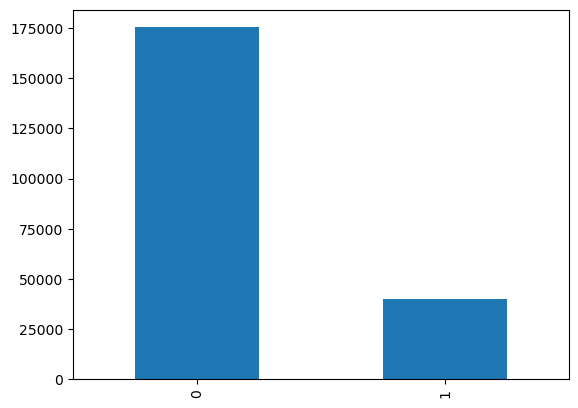

In [9]:
y.value_counts().plot(kind='bar')

In this data set, only 39932 of the total 215,258 transactions are fraudulent.This is an example of a data set with highly imbalanced classes, or, more generally speaking, a highly imbalanced classification problem.

In [10]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(version = 1 , n_neighbors = 10)

x_sm,y_sm= nm.fit_resample(X,y)

In [11]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.3, random_state=1)

In [12]:
# Instantiate the scaler
MM = MinMaxScaler()

# Fit the scaler and transform both data subsets
X_train_mm = MM.fit_transform(X_train)
X_test_mm = MM.transform(X_test)

In [13]:
from sklearn.metrics import confusion_matrix

# Define the models
models = [
    LogisticRegression(C=1),
    DecisionTreeClassifier(max_depth=10),
    SVC(probability=True),
    KNeighborsClassifier(n_neighbors=48)
]

# Evaluate each model and print the confusion matrix
for model in models:
    model.fit(X_train_mm, y_train)
    y_pred = model.predict(X_test_mm)
    confusion_mat = confusion_matrix(y_test, y_pred)
    
    print("Model:", type(model).__name__)
    print(confusion_mat)
    print()


Model: LogisticRegression
[[10733  1274]
 [ 3597  8356]]

Model: DecisionTreeClassifier
[[11115   892]
 [ 3648  8305]]

Model: SVC
[[11165   842]
 [ 3660  8293]]

Model: KNeighborsClassifier
[[10898  1109]
 [ 4975  6978]]



In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Define the models
models = [
    LogisticRegression(C=1),
    DecisionTreeClassifier(max_depth=10),
    SVC(probability=True),
    KNeighborsClassifier(n_neighbors=48)
]

# Evaluate each model
for model in models:
    # Train the model
    model.fit(X_train_mm, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test_mm)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Print the evaluation metrics for each model
    print("Model:", type(model).__name__)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    print()


Model: LogisticRegression
Accuracy: 0.7967028380634391
Precision: 0.8677050882658359
Recall: 0.6990713628377813
F1-Score: 0.7743131168048928

Model: DecisionTreeClassifier
Accuracy: 0.8104340567612688
Precision: 0.9030784292396389
Recall: 0.6945536685350958
F1-Score: 0.7852076042750402

Model: SVC
Accuracy: 0.8121035058430718
Precision: 0.9078270388615216
Recall: 0.6938007194846482
F1-Score: 0.7865136570561456

Model: KNeighborsClassifier
Accuracy: 0.7460767946577629
Precision: 0.8628663286756523
Recall: 0.5837864971136953
F1-Score: 0.6964071856287425



## 2. Fitting the Different Sklearn Machine Learning Classifiers

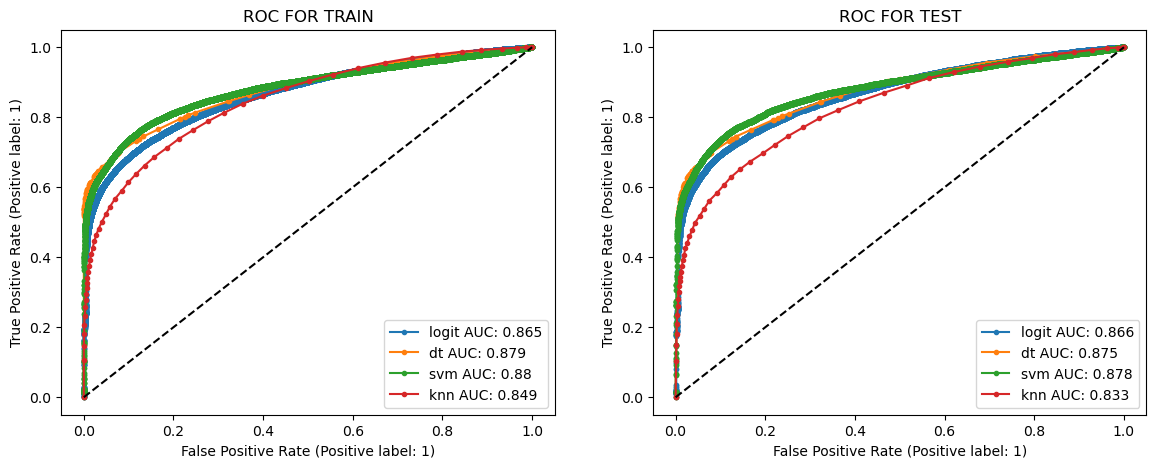

In [17]:
from sklearn.metrics import roc_auc_score

# Instantiate
models = [
    LogisticRegression(C=1),# choose best c values from part 3 
    DecisionTreeClassifier(max_depth=10), # choose best max_depth values from part 3 
    SVC(probability=True),
    KNeighborsClassifier(n_neighbors=48) # choose best n_neighbors values from part 3 
]

modelnames = ['logit', 'dt', 'svm', 'knn']

fig, axes = plt.subplots(1,2, figsize=(14, 5))

for i in range(4):
    # Fit 
    models[i].fit(X_train_mm, y_train)

    # Predict probabilities
    y_proba_train = models[i].predict_proba(X_train_mm)[:,1]
    y_proba_test = models[i].predict_proba(X_test_mm)[:, 1]

    # Score (AUC)
    auc_train = np.round(roc_auc_score(y_train, y_proba_train), 3)
    auc_test = np.round(roc_auc_score(y_test, y_proba_test), 3)
    
    train_label = f'{modelnames[i]} AUC: {auc_train}'
    test_label = f'{modelnames[i]} AUC: {auc_test}'

    # Plot ROC curve
    # Using RocCurveDisplay - pass in the fitted model, then the X data, then the y data
    RocCurveDisplay.from_estimator(models[i], X_train_mm, y_train, ax=axes[0], marker='.', label=train_label)
    RocCurveDisplay.from_estimator(models[i], X_test_mm, y_test, ax=axes[1], marker='.', label=test_label)

axes[0].plot([0,1], [0,1], color='black', linestyle='--')
axes[1].plot([0,1], [0,1], color='black', linestyle='--')
axes[0].set_title('ROC FOR TRAIN')
axes[1].set_title('ROC FOR TEST')

plt.show()

## 3. Summary


After evaluating the performance of the models, we observed minimal differences between their training and testing results, indicating that the models are not overfitting the data. Among the models tested, the SVM model achieved the highest area-under-the-curve (AUC) value for the test set, followed by the decision tree and logit regression models. However, when considering the performance on unseen data, the decision tree model outperformed the others.

Examining the receiver operating characteristic (ROC) curve, we can assess the trade-off between false positives and true positives. For instance, in the case of the SVM model, we can achieve a TPR (True Positive Rate) of approximately 0.8 at an FPR (False Positive Rate) of 0.1. This indicates the SVM model's ability to achieve a high true positive rate while keeping the false positive rate relatively low.

Overall, our evaluation highlights the comparative performance of the models, with the decision tree model demonstrating superior performance on unseen data. The ROC curve analysis provides valuable insights into the trade-off between false positives and true positives, underscoring the SVM model's favorable TPR at a low FPR.